In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300
import pandas as pd
import numpy as np

In [2]:
df_data = pd.read_csv("train_data.csv",header=None)
df_labels = pd.read_csv("train_labels.csv",header=None,names=["label"])
df_labels['label'].value_counts()


1     2178
2      618
3      326
6      260
4      253
5      214
8      195
7      141
9       92
10      86
Name: label, dtype: int64

In [177]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

def normalize(data):
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    norm_data = pd.DataFrame(x_scaled)
    return norm_data

def get_splits(data,labels,test_size=0.3,random_state=0):
    X = data.values
    y = labels.label.values
    return train_test_split(X,y, test_size=test_size, random_state=random_state)
    

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix  
import seaborn as sns
from sklearn.model_selection import cross_val_score

def test_classifier(clf,data,labels):
    X_train, X_test, y_train,y_test = get_splits(data=data,labels=df_labels)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    cm = cm / cm.astype(np.float).sum(axis=1)
    score = clf.score(X_test,y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score for classifier{1} is {0}'.format(score,clf)
    plt.title(all_sample_title, size = 15)
    plt.show()
    print(classification_report(y_test, y_pred))
    
def get_cv_score(clf,data,labels):
    X_train, X_test, y_train,y_test = get_splits(data=df_data_clean,labels=df_labels)
    scores = cross_val_score(clf, X_train,y_train, cv=5,scoring='f1_weighted')
    print("Accuracy for model %s : %0.2f (+/- %0.2f)" % (clf,scores.mean(), scores.std() * 2))

## Normalize the data

In [4]:
df_data_norm = normalize(data=df_data)
df_data_norm.shape

(4363, 264)

In [6]:
def compute_pca(Z, d):
    # Input: the N by D data matrix Z, the number of components d
    # Output: a d by D matrix W_pca, and all eigenvalues of Q
    
    ### STUDENT TASK ###
    
    # step1: compute the sample cov. matrix Q
    # YOUR CODE HERE
    N = Z.shape[0]
    Q = 1/N*(Z.T@Z)
    
    #step2: compute the eigenvalues and eigenvectors (see introduction notebook)
    # YOUR CODE HERE
    values,vectors = np.linalg.eig(Q)

    #step3: Sort the eigenvectors by decreasing eigenvalues, choose the d largest eigenvalues, form W_pca
    # YOUR CODE HERE
    sort  = np.argsort(values)
    largest = sort[-d:][::-1]
    W_pca = vectors[:,largest]
    W_pca = W_pca.T
    eigvalues = values
    
    return W_pca.real,eigvalues


## Compute the PCA matrix

In [75]:
PCA,eigvals = compute_pca(Z=df_data_norm.values,d=264)

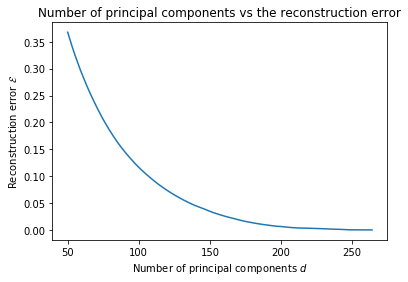

In [76]:
def plot_error(eigvalues,max_d):
    x=range(50,max_d+1)
    errors=[sum(eigvalues[d:]) for d in x]
    plt.plot(x,errors)
    plt.xlabel('Number of principal components $d$')
    plt.ylabel('Reconstruction error $\mathcal{E}$')
    plt.title('Number of principal components vs the reconstruction error')
    plt.show()

plot_error(eigvals,264)

In [ ]:
def plot_scatter(PCA,Z):
    # get x for d=2
    X_2d = np.matmul(PCA[:2,:],Z[:,:,None])[:,:,0]

    plt.scatter(X_2d[:15,0],X_2d[:15,1],c='r',marker='o',label='Apple')
    plt.scatter(X_2d[15:,0],X_2d[15:,1],c='y',marker='^',label='Banana')
    plt.legend()
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.show()
    

plot_scatter(PCA,df_data)

## Compressing the data

In [172]:
def compression(data,PCA,num_dims):
    data = data.values
    compr = data @ PCA[:num_dims,:].T
    return compr
    
df_comp=pd.DataFrame(compression(data=df_data_norm,PCA=PCA,num_dims=200))
df_comp.shape

(4363, 200)

C:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

[[587  30   7   5   5  21   1   9   0   1]
 [ 43 101   5   9   0   3   0   0   1   0]
 [ 10   9  72   1   0   5   0   0   3   1]
 [ 17   7   0  37   2   3   0   0   0   2]
 [ 35   4   1   5  14   8   2   3   0   1]
 [ 33   6   8   4   2  28   0   0   2   0]
 [ 14   4   4   2   7   1   2   2   0   2]
 [ 41   1   1   1   2   2   0  14   0   1]
 [  5   3   4   0   0   2   0   0  10   0]
 [ 23   0   2   3   2   0   0   0   0   1]]


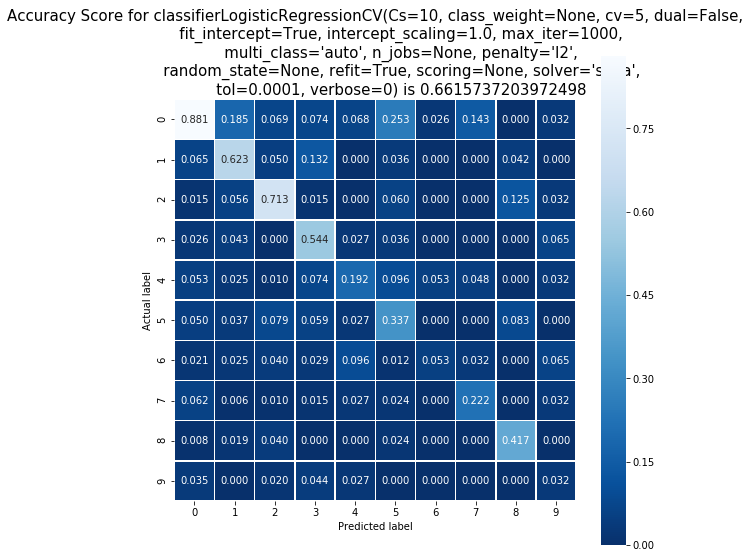

              precision    recall  f1-score   support

           1       0.73      0.88      0.80       666
           2       0.61      0.62      0.62       162
           3       0.69      0.71      0.70       101
           4       0.55      0.54      0.55        68
           5       0.41      0.19      0.26        73
           6       0.38      0.34      0.36        83
           7       0.40      0.05      0.09        38
           8       0.50      0.22      0.31        63
           9       0.62      0.42      0.50        24
          10       0.11      0.03      0.05        31

   micro avg       0.66      0.66      0.66      1309
   macro avg       0.50      0.40      0.42      1309
weighted avg       0.62      0.66      0.63      1309



In [175]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  


log_clf = LogisticRegressionCV(Cs=10,solver='saga',multi_class='auto',max_iter=1000,cv=5)
svc_clf = SVC(kernel='linear',C=3.5)
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=600,learning_rate=1)

test_classifier(log_clf,df_comp,df_labels)


[[376  58   9  29  55  28  33  60   2  16]
 [ 16 105   5  15   8   2   8   0   1   2]
 [  1  10  68   2   2   8   0   0   7   3]
 [  3   7   3  36   4   2   5   1   1   6]
 [ 14   5   6   8  23   2   8   4   1   2]
 [  3   8   7   5   9  38   5   3   2   3]
 [  1   3   2   3  11   4   7   5   0   2]
 [ 13   1   1   0  11   3   5  26   1   2]
 [  1   3   3   0   1   1   3   0  12   0]
 [ 10   0   1   6   2   3   2   2   1   4]]


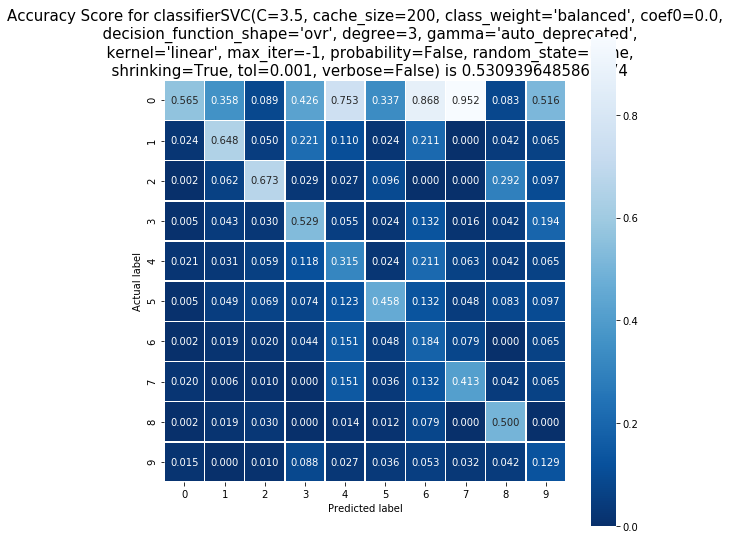

              precision    recall  f1-score   support

           1       0.86      0.56      0.68       666
           2       0.53      0.65      0.58       162
           3       0.65      0.67      0.66       101
           4       0.35      0.53      0.42        68
           5       0.18      0.32      0.23        73
           6       0.42      0.46      0.44        83
           7       0.09      0.18      0.12        38
           8       0.26      0.41      0.32        63
           9       0.43      0.50      0.46        24
          10       0.10      0.13      0.11        31

   micro avg       0.53      0.53      0.53      1309
   macro avg       0.39      0.44      0.40      1309
weighted avg       0.63      0.53      0.56      1309



In [158]:
svc_bal_clf = SVC(kernel='linear',C=3.5,class_weight='balanced')

test_classifier(svc_bal_clf,df_comp,df_labels)

In [35]:
df_kaggle = pd.read_csv('test_data.csv',header=None)
df_kaggle.head()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,3115.5,3151.9,2742.2,3236.8,2580.6,2662.6,2372.2,2569.6,2310.7,2502.1,...,0.202000,0.27811,0.138290,0.16759,0.106690,0.135000,0.087223,0.115030,0.074181,0.082354
1,2055.0,3225.7,2273.5,3601.9,1959.3,2212.3,1720.4,1640.4,1157.1,1132.5,...,0.095165,0.17908,0.134300,0.14612,0.062988,0.113780,0.076223,0.105320,0.104750,0.067400
2,1601.2,3768.1,3591.0,3452.4,2935.9,2913.4,2479.6,2108.8,1823.8,1711.3,...,0.114550,0.30952,0.096229,0.10636,0.037123,0.085613,0.051728,0.074393,0.047407,0.043231
3,2745.0,4585.8,4246.0,3937.6,3423.9,4108.2,3096.5,3469.6,3002.5,3525.0,...,0.112300,0.42906,0.057022,0.16610,0.057594,0.127360,0.017878,0.075741,0.092060,0.028369
4,1515.0,2403.5,2461.6,2399.1,1999.4,2195.8,2123.0,2030.7,1737.4,1875.5,...,0.098629,0.27692,0.057491,0.24435,0.039830,0.050223,0.045778,0.078015,0.067199,0.043448


In [69]:
df_kaggle_norm = normalize(data=df_kaggle)
df_kaggle_comp = compression(data=df_kaggle_norm,PCA=PCA,num_dims=200)
df_kaggle_comp.shape

(6544, 200)

In [147]:
kaggle_pred = svc_clf.predict(df_kaggle_comp)
result = pd.DataFrame(data=kaggle_pred,columns=["Sample_label",])
result['Sample_id'] = result.index+1
output = pd.DataFrame()
output['Sample_id'] = result['Sample_id']
output['Sample_label'] = result['Sample_label']
output

,Sample_id,Sample_label
0,1,4
1,2,1
2,3,1
3,4,1
4,5,1
5,6,8
6,7,1
7,8,1
8,9,1
9,10,2


## Writing to file

In [149]:
file_name = "accuracy_solution_24_Oct_2.csv"
output.to_csv(file_name,index=False)


In [1]:
t1 = pd.read_csv('accuracy_solution_22_Oct_1.csv')
t2 = pd.read_csv('accuracy_solution_24_Oct_1.csv')
sum(t2['Sample_label']!=output['Sample_label'])

NameError: name 'pd' is not defined